In [1]:
#sigmoid function
import numpy as np

In [2]:
def sigmoid (sum):
  return 1/ (1 + np.exp(-sum));

In [3]:
sigmoid(31)

0.9999999999999656

In [6]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

In [7]:
inputs.shape

(4, 2)

In [8]:
outputs = np.array([[0],[1],[1],[0]])

In [9]:
 outputs.shape

(4, 1)

In [10]:
weights0 = np.array([[-0.424, -0.740, -0.961], [0.358, -0.577, -0.469]])

In [11]:
weights0.shape

(2, 3)

In [12]:
weights1 = np.array([[-0.017],[-0.893],[0.148]])
weights1.shape

(3, 1)

In [13]:
epochs = 100
learning_rate = 0.3

In [14]:
for epoch in epochs:

SyntaxError: incomplete input (<ipython-input-14-93b24de91d57>, line 1)

In [14]:
input_layer = inputs

In [15]:
sum_synapse0 = np.dot(input_layer, weights0)

In [16]:
sum_synapse0

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

In [17]:
hidden_layer = sigmoid(sum_synapse0)
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [18]:
weights1 = np.array([[-0.017],[-0.893],[0.148]])

In [19]:
sum_synapse1 = np.dot(hidden_layer, weights1)

In [20]:
sum_synapse1

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

In [21]:
output_layer = sigmoid(sum_synapse1)

In [22]:
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [23]:
outputs

array([[0],
       [1],
       [1],
       [0]])

In [24]:
error_output_layer= outputs - output_layer
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [25]:
average_error = np.mean(abs(error_output_layer))

In [26]:
average_error

0.49880848923713045

In [27]:
#partial derivative of error_function(gradient descent)
def sigmoid_derivative(sigmoid):
  return sigmoid*(1-sigmoid)

In [28]:

s = sigmoid(0.5)
s

0.6224593312018546

In [29]:
d = sigmoid_derivative(s)
d
#main reason is to use this value to find direction of gradient decscent for updating weights

0.2350037122015945

In [30]:
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [31]:

derivatives_output = sigmoid_derivative(output_layer)
derivatives_output

array([[0.2411425 ],
       [0.24535947],
       [0.24600391],
       [0.24823702]])

In [32]:
#delta values array
delta_output = derivatives_output*error_output_layer
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [33]:
sigmoid_derivative_hidden = sigmoid_derivative(hidden_layer)
sigmoid_derivative_hidden

array([[0.25      , 0.25      , 0.25      ],
       [0.2421578 , 0.23029435, 0.23674116],
       [0.23909228, 0.21867247, 0.20012729],
       [0.24972795, 0.16666262, 0.15581158]])

In [37]:
#as we cannot multiply the matrices as is we take transpose because formulae for delta hidden requires multiplication of 3 matrcies
weights1T = weights1.T
weights1T

array([[-0.017, -0.893,  0.148]])

In [38]:
weights1.shape , weights1T.shape

((3, 1), (1, 3))

In [39]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [40]:
#dot product is used instead of normal product
delta_output_X_weight = delta_output.dot(weights1T)
delta_output_X_weight

array([[ 0.0016639 ,  0.08740354, -0.01448569],
       [-0.0023697 , -0.12447882,  0.02063031],
       [-0.0023554 , -0.12372783,  0.02050584],
       [ 0.00193282,  0.10153015, -0.01682694]])

In [41]:
delta_hidden = delta_output_X_weight * sigmoid_derivative_hidden
delta_hidden

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [42]:
#weight updation of only the first neuron of the hidden layer
#in formulae for weight updation
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [43]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [44]:
#we need to invert the metrix by taking transpose
hidden_layerT= hidden_layer.T
hidden_layerT

array([[0.5       , 0.5885562 , 0.39555998, 0.48350599],
       [0.5       , 0.35962319, 0.32300414, 0.21131785],
       [0.5       , 0.38485296, 0.27667802, 0.19309868]])

In [45]:
input_X_delta1 = hidden_layerT.dot(delta_output)
input_X_delta1

array([[0.03293657],
       [0.02191844],
       [0.02108814]])

In [46]:
weights1 = weights1 + (input_X_delta1 * learning_rate)
weights1

array([[-0.00711903],
       [-0.88642447],
       [ 0.15432644]])

In [47]:
#weight update for the input and hidden layer
input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [48]:
delta_hidden

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [49]:
input_layerT = input_layer.T
input_layerT

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [50]:
input_X_delta0 = input_layerT.dot(delta_hidden)
input_X_delta0

array([[-8.04778516e-05, -1.01345901e-02,  1.48194623e-03],
       [-9.11603819e-05, -1.17454886e-02,  2.26221011e-03]])

In [51]:
weights0 = weights0 + (input_X_delta0 * learning_rate)
weights0

array([[-0.42402414, -0.74304038, -0.96055542],
       [ 0.35797265, -0.58052365, -0.46832134]])

In [52]:
#compiling and running the final code

import numpy as np

def sigmoid (sum):
  return 1/ (1 + np.exp(-sum));


def sigmoid_derivative(sigmoid):
  return sigmoid*(1-sigmoid)

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
outputs = np.array([[0],[1],[1],[0]])

In [53]:
##weights0 = np.array([[-0.424, -0.740, -0.961], [0.358, -0.577, -0.469]])
##weights1 = np.array([[-0.017],[-0.893],[0.148]])
weights0 = 2 * np.random.random((2,3)) - 1
weights1 = 2 * np.random.random((3,1)) - 1
weights0, weights1



(array([[-0.84843467,  0.0035455 ,  0.52564885],
        [ 0.2273155 ,  0.55197706, -0.15509707]]),
 array([[-0.87416603],
        [ 0.44053452],
        [ 0.89229974]]))

In [54]:
epochs = 100000
learning_rate = 0.1
error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer= outputs - output_layer
  average_error = np.mean(abs(error_output_layer))
  if epoch % 10000 == 0:#print after every 10 epochs
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average_error))

  derivatives_output = sigmoid_derivative(output_layer)
  delta_output = derivatives_output*error_output_layer

  weights1T = weights1.T
  delta_output_X_weight = delta_output.dot(weights1T)
  delta_hidden = delta_output_X_weight * sigmoid_derivative_hidden

  hidden_layerT= hidden_layer.T
  input_X_delta1 = hidden_layerT.dot(delta_output)
  weights1 = weights1 + (input_X_delta1 * learning_rate)

  input_layerT = input_layer.T
  input_X_delta0 = input_layerT.dot(delta_hidden)
  weights0 = weights0 + (input_X_delta0 * learning_rate)




Epoch: 1 Error: 0.5005213153249126
Epoch: 10001 Error: 0.4643773400627379
Epoch: 20001 Error: 0.4220687968128177
Epoch: 30001 Error: 0.4399936595042372
Epoch: 40001 Error: 0.4387962410871099
Epoch: 50001 Error: 0.41945974401596764
Epoch: 60001 Error: 0.4077294529251808
Epoch: 70001 Error: 0.4006146616038962
Epoch: 80001 Error: 0.3972973537952341
Epoch: 90001 Error: 0.39632584749030175


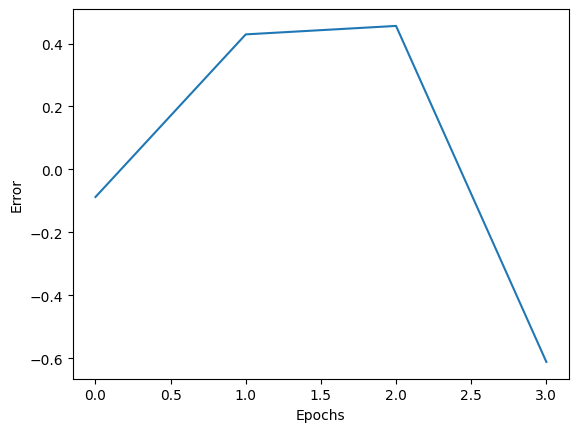

In [55]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error_output_layer)


In [56]:
outputs

array([[0],
       [1],
       [1],
       [0]])

In [57]:
output_layer

array([[0.08779232],
       [0.57077001],
       [0.54390168],
       [0.61198032]])

In [58]:
weights0, weights1

(array([[ -3.98888465, -14.35386302,  -0.46385277],
        [ -4.25407537,  -3.37189492,  25.36726502]]),
 array([[ 0.00837955],
        [-5.14581378],
        [ 0.4556423 ]]))

In [59]:
def calculate_output(instance):
  hidden_layer = sigmoid(np.dot(instance, weights0))
  output_layer = sigmoid(np.dot(hidden_layer, weights1))
  return output_layer[0]

In [60]:
calculate_output(np.array([[1,1]]))

array([0.6119804])

In [61]:
#running the MLP on iris dataset
from sklearn import datasets

In [69]:
iris = datasets.load_iris()


In [71]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [72]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [73]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [80]:
#we can only work with dataset with 2 classes(0 and 1)
inputs = iris.data[0:100]
inputs

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [76]:
len(inputs )

100

In [77]:
inputs.shape

(100, 4)

In [79]:
outputs = iris.target[0:100]
outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
outputs.shape

(100,)

In [82]:
#we need rows and columns in output array to make it a matrix instead of a vector

In [83]:
outputs = outputs.reshape(-1,1)
outputs.shape

(100, 1)

In [86]:
#load the neural network
import numpy as np

def sigmoid (sum):
  return 1/ (1 + np.exp(-sum));


def sigmoid_derivative(sigmoid):
  return sigmoid*(1-sigmoid)

weights0 = 2 * np.random.random((4,3)) - 1
weights1 = 2 * np.random.random((3,1)) - 1
weights0, weights1



(array([[-0.04935778, -0.56873786,  0.69336689],
        [ 0.08267375,  0.05264794,  0.52078433],
        [ 0.64008776, -0.82316146, -0.21471754],
        [-0.34855667, -0.7433469 , -0.96101944]]),
 array([[0.27067387],
        [0.24165181],
        [0.13065305]]))

In [90]:
epochs = 100000
learning_rate = 0.3
error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer= outputs - output_layer
  average_error = np.mean(abs(error_output_layer))
  if epoch % 10000 == 0:#print after every 10 epochs
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average_error))
    error.append(average_error)

  derivatives_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivatives_output

  weights1T = weights1.T
  delta_output_X_weight = delta_output.dot(weights1T)
  delta_hidden = delta_output_X_weight * sigmoid_derivative(hidden_layer)

  hidden_layerT= hidden_layer.T
  input_X_delta1 = hidden_layerT.dot(delta_output)
  weights1 = weights1 + (input_X_delta1 * learning_rate)

  input_layerT = input_layer.T
  input_X_delta0 = input_layerT.dot(delta_hidden)
  weights0 = weights0 + (input_X_delta0 * learning_rate)

Epoch: 1 Error: 0.4999999867113087
Epoch: 10001 Error: 0.49999998507253224
Epoch: 20001 Error: 0.4999999829743716
Epoch: 30001 Error: 0.4999999801921875
Epoch: 40001 Error: 0.4999999763262785
Epoch: 50001 Error: 0.4999999705899705
Epoch: 60001 Error: 0.49999996119130835
Epoch: 70001 Error: 0.4999999429708026
Epoch: 80001 Error: 0.49999989244714527
Epoch: 90001 Error: 0.4999990198986166


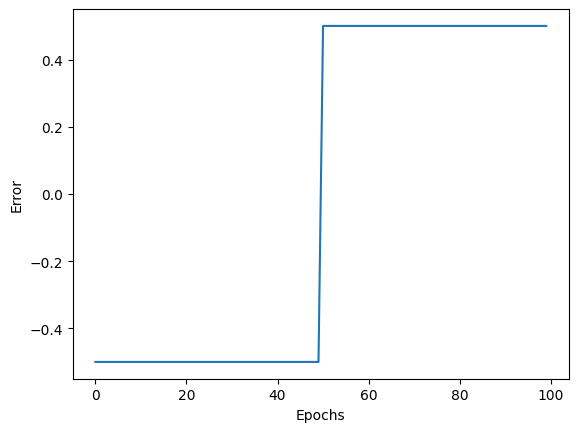

In [91]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error_output_layer)


In [92]:
def calculate_output(instance):
  hidden_layer = sigmoid(np.dot(instance, weights0))
  output_layer = sigmoid(np.dot(hidden_layer, weights1))
  return output_layer[0]